In [22]:
import sklearn
from tsai.basics import *
my_setup(sklearn)
import config

os              : Windows-10-10.0.19045-SP0
python          : 3.11.5
tsai            : 0.3.8
fastai          : 2.7.13
fastcore        : 1.5.29
sklearn         : 1.3.2
torch           : 2.1.1+cpu
device          : cpu
cpu cores       : 6
threads per cpu : 1
RAM             : 15.8 GB
GPU memory      : [2.0] GB


In [23]:
import pandas as pd
df=pd.read_csv('D:/project/Boiler1.csv')
#df=df.drop(config.ENERGY_DROP_COLOUMNS,axis=1)
print(df.columns)
df.head(5)

Index(['DateString', 'Boiler2_Feed Water Temp (T-4) (°F)',
       'Boiler2_Gas Flow (G-2) (MMBtu)', 'Boiler2_Make Up Flow (W-17) (kGal)',
       'Boiler2_Steam Flow (S-1) (lbs)'],
      dtype='object')


DateString  Boiler2_Feed Water Temp (T-4) (°F)  \
0  01-01-2023 00:59                                 244   
1  01-01-2023 01:59                                 258   
2  01-01-2023 02:59                                 257   
3  01-01-2023 03:59                                 258   
4  01-01-2023 04:59                                 254   

   Boiler2_Gas Flow (G-2) (MMBtu)  Boiler2_Make Up Flow (W-17) (kGal)  \
0                            1.40                                0.78   
1                            1.37                                0.03   
2                            1.36                                0.03   
3                            1.39                                0.03   
4                            1.32                                0.06   

   Boiler2_Steam Flow (S-1) (lbs)  
0                            1084  
1                            1069  
2                            1077  
3                            1094  
4                            1077

In [24]:
'''
datetime_col=config.BOILER_DATETIME
freq=config.FREQUENCY
coloumns=config.BOILER_COLOUMNS
method=config.METHOD
value=config.VALUE


preproc_pipe=sklearn.pipeline.Pipeline([
    ('shrinker',TSShrinkDataFrame()),
    ('drop_duplicates',TSDropDuplicates(datetime_col=datetime_col)),
    ('add_mts',TSAddMissingTimestamps(datetime_col=datetime_col,freq=freq)),
    ('fill_missing',TSFillMissing(columns=coloumns,method=method,value=value)),
    ],
    verbose=True)

mkdir('data', exist_ok=True,parents=True)
save_object(preproc_pipe,'data/boiler_preproc_pipe.pkl')
preproc_pipe=load_object('data/boiler_preproc_pipe.pkl')
'''
df=preproc_pipe.fit_transform(df)

df

Initial memory usage: 111.54 KB 
Final memory usage  : 55.83 KB   (-49.9%)
[Pipeline] .......... (step 1 of 4) Processing shrinker, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing drop_duplicates, total=   0.0s
[Pipeline] ........... (step 3 of 4) Processing add_mts, total=   0.0s
[Pipeline] ...... (step 4 of 4) Processing fill_missing, total=   0.0s


DateString  Boiler2_Feed Water Temp (T-4) (°F)  \
0    2023-01-01 00:59:00                               244.0   
1    2023-01-01 01:59:00                               258.0   
2    2023-01-01 02:59:00                               257.0   
3    2023-01-01 03:59:00                               258.0   
4    2023-01-01 04:59:00                               254.0   
...                  ...                                 ...   
2853 2023-04-29 21:59:00                               224.0   
2854 2023-04-29 22:59:00                               226.0   
2855 2023-04-29 23:59:00                               226.0   
2856 2023-04-30 00:59:00                               233.0   
2857 2023-04-30 01:59:00                               234.0   

      Boiler2_Gas Flow (G-2) (MMBtu)  Boiler2_Make Up Flow (W-17) (kGal)  \
0                               1.40                                0.78   
1                               1.37                                0.03   
2                               1.36                                0.03   
3                               1.39                                0.03   
4                               1.32                                0.06   
...                              ...                                 ...   
2853                            2.45                                0.21   
2854                            1.50                                0.04   
2855                            2.08                                0.28   
2856                            1.04                                0.04   
2857                            0.99                                0.09   

      Boiler2_Steam Flow (S-1) (lbs)  
0                             1084.0  
1                             1069.0  
2                             1077.0  
3                             1094.0  
4                             1077.0  
...                              ...  
2853                          1858.0  
2854                          1073.0  
2855                          1557.0  
2856                           679.0  
2857                           657.0  

[2858 rows x 5 columns]

In [25]:
df.dtypes

DateString                            datetime64[ns]
Boiler2_Feed Water Temp (T-4) (°F)           float64
Boiler2_Gas Flow (G-2) (MMBtu)               float32
Boiler2_Make Up Flow (W-17) (kGal)           float32
Boiler2_Steam Flow (S-1) (lbs)               float64
dtype: object

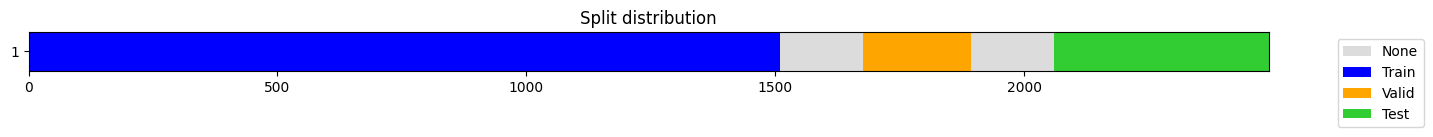

((#1510) [0,1,2,3,4,5,6,7,8,9...],
 (#216) [1677,1678,1679,1680,1681,1682,1683,1684,1685,1686...],
 (#431) [2060,2061,2062,2063,2064,2065,2066,2067,2068,2069...])

In [5]:
fcst_history= config.FCST_HISTORY
fcst_horizon= config.FCST_HORIZON
valid_size= config.VALID_SIZE
test_size= config.TEST_SIZE

splits=get_forecasting_splits(df,fcst_history=fcst_history,fcst_horizon=fcst_horizon,datetime_col=datetime_col,
                              valid_size=valid_size,test_size=test_size)

splits

In [6]:
coloumns=config.BOILER_COLOUMNS
train_split=splits[0]


exp_pipe=sklearn.pipeline.Pipeline([
    ('scaler',TSStandardScaler(columns=coloumns)),
    ],
    verbose=True)


save_object(exp_pipe,'data/Ener_exp_pipe.pkl')
exp_pipe=load_object('data/Ener_exp_pipe.pkl')

df_scaled=exp_pipe.fit_transform(df,scaler__idxs=train_split)

df_scaled

data directory already exists.
Pipeline saved as data\Ener_exp_pipe.pkl
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s


DateString  Boiler2_Feed Water Temp (T-4) (°F)  \
0    2023-01-01 00:59:00                           -0.068402   
1    2023-01-01 01:59:00                            0.640783   
2    2023-01-01 02:59:00                            0.590127   
3    2023-01-01 03:59:00                            0.640783   
4    2023-01-01 04:59:00                            0.438158   
...                  ...                                 ...   
2853 2023-04-29 21:59:00                           -1.081524   
2854 2023-04-29 22:59:00                           -0.980212   
2855 2023-04-29 23:59:00                           -0.980212   
2856 2023-04-30 00:59:00                           -0.625620   
2857 2023-04-30 01:59:00                           -0.574963   

      Boiler2_Gas Flow (G-2) (MMBtu)  Boiler2_Make Up Flow (W-17) (kGal)  \
0                          -0.962832                            2.770006   
1                          -1.013630                           -0.963756   
2                          -1.030563                           -0.963756   
3                          -0.979764                           -0.963756   
4                          -1.098293                           -0.814405   
...                              ...                                 ...   
2853                        0.815102                           -0.067653   
2854                       -0.793505                           -0.913972   
2855                        0.188592                            0.280832   
2856                       -1.572409                           -0.913972   
2857                       -1.657073                           -0.665055   

      Boiler2_Steam Flow (S-1) (lbs)  
0                          -0.944817  
1                          -0.974291  
2                          -0.958571  
3                          -0.925167  
4                          -0.958571  
...                              ...  
2853                        0.576042  
2854                       -0.966431  
2855                       -0.015403  
2856                       -1.740614  
2857                       -1.783843  

[2858 rows x 5 columns]

In [7]:
x_vars=config.BOILER_COLOUMNS
y_vars=config.BOILER_COLOUMNS

In [8]:
X,y=prepare_forecasting_data(df,fcst_history=fcst_history,fcst_horizon=fcst_horizon,x_vars=x_vars,y_vars=y_vars)
X.shape , y.shape

((2491, 4, 200), (2491, 4, 168))

In [9]:
learn=TSForecaster(X,y,splits=splits,
                   batch_size=16,path="models",
                   pipelines=[preproc_pipe,exp_pipe],
                   arch="InceptionTimePlus",
                   #arch_config=arch_config,
                   metrics=[mae,mape],
                   cbs=ShowGraph())

In [10]:
learn.summary()

not enough values to plot a chart


InceptionTimePlus (Input shape: 16 x 4 x 200)
Layer (type)         Output Shape         Param #    Trainable 
                     16 x 32 x 200       
Conv1d                                    128        True      
Conv1d                                    39936      True      
Conv1d                                    19456      True      
Conv1d                                    9216       True      
MaxPool1d                                                      
____________________________________________________________________________
                     16 x 32 x 200       
Conv1d                                    128        True      
____________________________________________________________________________
                     16 x 128 x 200      
Concat                                                         
BatchNorm1d                               256        True      
ReLU                                                           
__________________________________

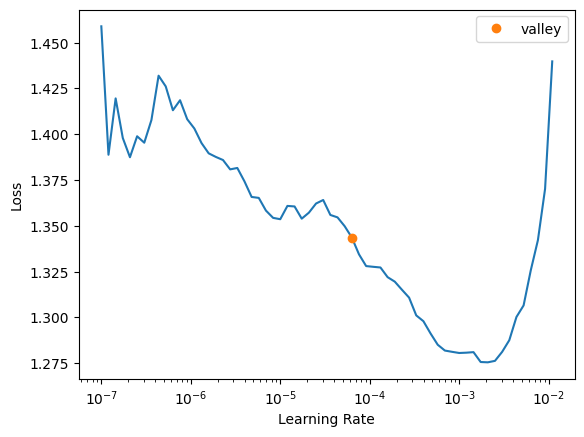

In [11]:
lr_max=learn.lr_find().valley

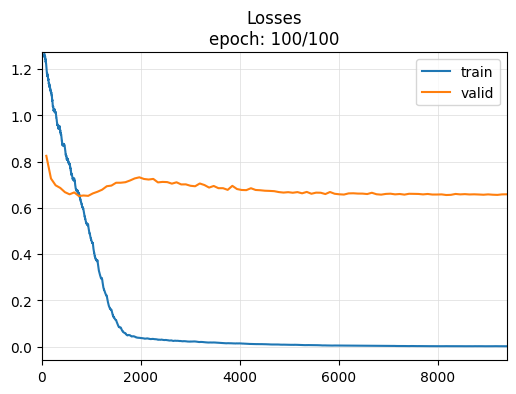

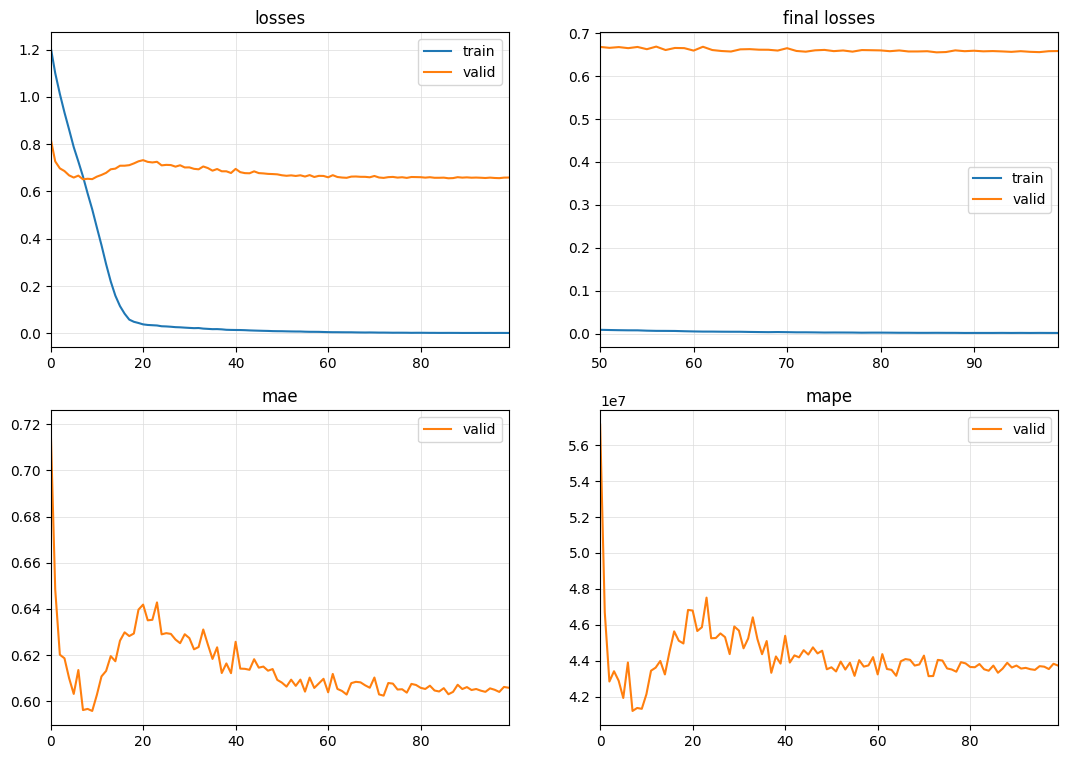

In [12]:
n_epochs=100

learn.fit_one_cycle(n_epoch=n_epochs,lr_max=lr_max)
learn.export('BoilerInceptionTime.pt')

In [13]:
from tsai.inference import load_learner
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

learn=load_learner('models/BoilerInceptionTime.pt')
y_test_preds, *_=learn.get_X_preds(X[splits[2]])
y_test_preds=to_np(y_test_preds)
print(y_test_preds.shape)

y_test=y[splits[2]]

print(mean_squared_error(y_test.flatten(),y_test_preds.flatten()))
print(mean_absolute_error(y_test.flatten(),y_test_preds.flatten()))
print(mean_absolute_percentage_error(y_test.flatten(),y_test_preds.flatten()))

(431, 4, 168)
0.8512357553306085
0.6979956265191642
1.2796888738407555


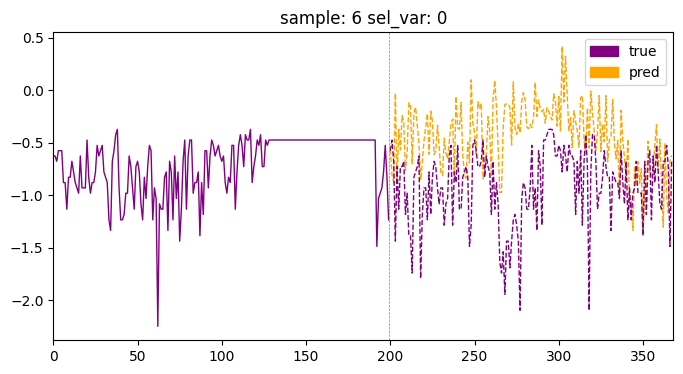

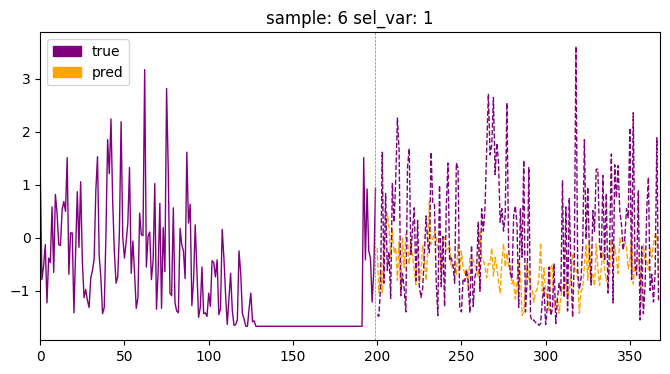

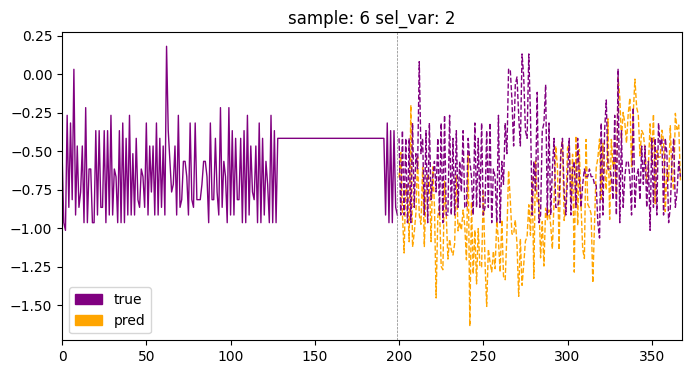

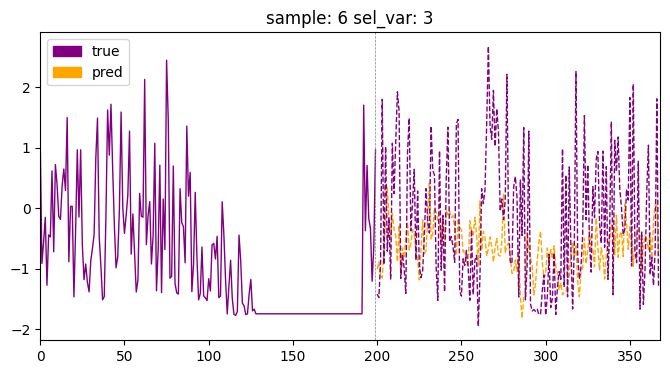

In [14]:
X_test=X[splits[2]]
plot_forecast(X_test,y_test,y_test_preds,sel_vars=True)

In [26]:
fcst_date="2023-04-30 01:59:00"
dates=pd.date_range(start=None,end=fcst_date,periods=config.FCST_HISTORY,freq=config.FREQUENCY)
dates

DatetimeIndex(['2023-04-21 18:59:00', '2023-04-21 19:59:00',
               '2023-04-21 20:59:00', '2023-04-21 21:59:00',
               '2023-04-21 22:59:00', '2023-04-21 23:59:00',
               '2023-04-22 00:59:00', '2023-04-22 01:59:00',
               '2023-04-22 02:59:00', '2023-04-22 03:59:00',
               ...
               '2023-04-29 16:59:00', '2023-04-29 17:59:00',
               '2023-04-29 18:59:00', '2023-04-29 19:59:00',
               '2023-04-29 20:59:00', '2023-04-29 21:59:00',
               '2023-04-29 22:59:00', '2023-04-29 23:59:00',
               '2023-04-30 00:59:00', '2023-04-30 01:59:00'],
              dtype='datetime64[ns]', length=200, freq='H')

In [27]:
new_df=df[df[config.BOILER_DATETIME].isin(dates)].reset_index(drop=True)
new_df

DateString  Boiler2_Feed Water Temp (T-4) (°F)  \
0   2023-04-21 18:59:00                               234.0   
1   2023-04-21 19:59:00                               223.0   
2   2023-04-21 20:59:00                               228.0   
3   2023-04-21 21:59:00                               231.0   
4   2023-04-21 22:59:00                               219.0   
..                  ...                                 ...   
195 2023-04-29 21:59:00                               224.0   
196 2023-04-29 22:59:00                               226.0   
197 2023-04-29 23:59:00                               226.0   
198 2023-04-30 00:59:00                               233.0   
199 2023-04-30 01:59:00                               234.0   

     Boiler2_Gas Flow (G-2) (MMBtu)  Boiler2_Make Up Flow (W-17) (kGal)  \
0                              1.20                                0.03   
1                              1.85                                0.15   
2                              1.92                                0.03   
3                              1.36                                0.15   
4                              2.52                                0.04   
..                              ...                                 ...   
195                            2.45                                0.21   
196                            1.50                                0.04   
197                            2.08                                0.28   
198                            1.04                                0.04   
199                            0.99                                0.09   

     Boiler2_Steam Flow (S-1) (lbs)  
0                             829.0  
1                            1382.0  
2                            1458.0  
3                             929.0  
4                            1934.0  
..                              ...  
195                          1858.0  
196                          1073.0  
197                          1557.0  
198                           679.0  
199                           657.0  

[200 rows x 5 columns]

In [28]:
from tsai.inference import load_learner

predict=load_learner('models/BoilerInceptionTime.pt')
new_df=predict.transform(new_df)

new_df

Initial memory usage: 6.38 KB   
Final memory usage  : 4.04 KB    (-36.7%)


DateString  Boiler2_Feed Water Temp (T-4) (°F)  \
0   2023-04-21 18:59:00                           -0.574963   
1   2023-04-21 19:59:00                           -1.132180   
2   2023-04-21 20:59:00                           -0.878900   
3   2023-04-21 21:59:00                           -0.726932   
4   2023-04-21 22:59:00                           -1.334805   
..                  ...                                 ...   
195 2023-04-29 21:59:00                           -1.081524   
196 2023-04-29 22:59:00                           -0.980212   
197 2023-04-29 23:59:00                           -0.980212   
198 2023-04-30 00:59:00                           -0.625620   
199 2023-04-30 01:59:00                           -0.574963   

     Boiler2_Gas Flow (G-2) (MMBtu)  Boiler2_Make Up Flow (W-17) (kGal)  \
0                         -1.301486                           -0.963756   
1                         -0.200860                           -0.366354   
2                         -0.082331                           -0.963756   
3                         -1.030563                           -0.366354   
4                          0.933631                           -0.913972   
..                              ...                                 ...   
195                        0.815102                           -0.067653   
196                       -0.793505                           -0.913972   
197                        0.188592                            0.280832   
198                       -1.572409                           -0.913972   
199                       -1.657073                           -0.665055   

     Boiler2_Steam Flow (S-1) (lbs)  
0                         -1.445874  
1                         -0.359267  
2                         -0.209932  
3                         -1.249381  
4                          0.725376  
..                              ...  
195                        0.576042  
196                       -0.966431  
197                       -0.015403  
198                       -1.740614  
199                       -1.783843  

[200 rows x 5 columns]

In [20]:
new_x,__=prepare_forecasting_data(new_df,fcst_history=fcst_history,fcst_horizon=0,x_vars=x_vars,y_vars=y_vars)
new_x.shape

(1, 4, 200)

In [21]:
new_scaled_preds, *_ = learn.get_X_preds(new_x)

new_scaled_preds=to_np(new_scaled_preds).swapaxes(1,2).reshape(-1,len(y_vars))
dates=pd.date_range(start=fcst_date, periods=fcst_horizon+1,freq='1H')[1:]
preds_df=pd.DataFrame(dates,columns=[datetime_col])
preds_df.loc[:, y_vars]=new_scaled_preds
preds_df=learn.inverse_transform(preds_df)

preds_df

DateString  Boiler2_Feed Water Temp (T-4) (°F)  \
0   2023-04-30 02:59:00                          188.790710   
1   2023-04-30 03:59:00                          206.331833   
2   2023-04-30 04:59:00                          136.474930   
3   2023-04-30 05:59:00                          222.229340   
4   2023-04-30 06:59:00                          210.030518   
..                  ...                                 ...   
163 2023-05-06 21:59:00                          178.999008   
164 2023-05-06 22:59:00                          199.195999   
165 2023-05-06 23:59:00                          203.386154   
166 2023-05-07 00:59:00                          170.472839   
167 2023-05-07 01:59:00                          187.758774   

     Boiler2_Gas Flow (G-2) (MMBtu)  Boiler2_Make Up Flow (W-17) (kGal)  \
0                          2.072406                            0.425341   
1                          1.050013                            0.027384   
2                          1.825419                            0.298188   
3                          0.686220                            0.146668   
4                         -0.211666                           -0.013583   
..                              ...                                 ...   
163                        0.293981                           -0.579767   
164                        0.841061                           -0.465206   
165                        0.893597                           -0.461482   
166                        0.644344                           -0.620277   
167                        0.749556                           -0.578807   

     Boiler2_Steam Flow (S-1) (lbs)  
0                        149.230591  
1                        563.959961  
2                        426.062256  
3                       -300.354004  
4                        292.448975  
..                              ...  
163                      370.311890  
164                      665.130981  
165                      615.343140  
166                      513.609009  
167                       71.503906  

[168 rows x 5 columns]

In [ ]:
new_scaled_preds
plot_forecast(,sel_vars=True)